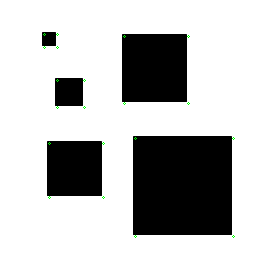

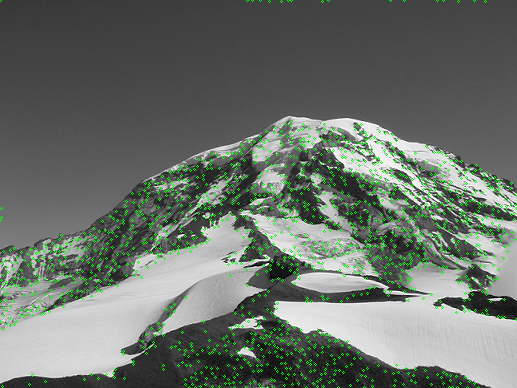

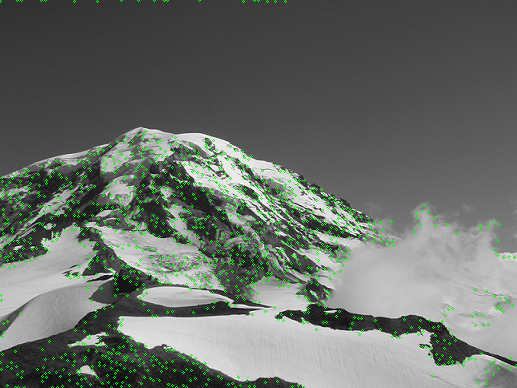

True

In [99]:
import numpy as np
import cv2
import glob
from google.colab.patches import cv2_imshow

def GetSobel(image, Sobel, width, height):
    I_d = np.zeros((width, height), np.float32)

    for rows in range(width):
        for cols in range(height):
            
            if rows >= 1 or rows <= width-2 and cols >= 1 or cols <= height-2:
                for ind in range(3):
                    for ite in range(3):
                        I_d[rows][cols] += Sobel[ind][ite] * image[rows - ind - 1][cols - ite - 1]
            else:
                I_d[rows][cols] = image[rows][cols]

    return I_d


def HarrisCornerDetection(image):

    SobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    SobelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    w, h = image.shape

    ImgX = GetSobel(image, SobelX, w, h)
    ImgY = GetSobel(image, SobelY, w, h)

    for ind1 in range(w):
        for ind2 in range(h):
            if ImgY[ind1][ind2] < 0:
                ImgY[ind1][ind2] *= -1
                # ImgY[ind1][ind2] = 0
            if ImgX[ind1][ind2] < 0:
                ImgX[ind1][ind2] *= -1
                # ImgX[ind1][ind2] = 0
    ImgX_2 = np.square(ImgX)
    ImgY_2 = np.square(ImgY)

    ImgXY = np.multiply(ImgX, ImgY)
    ImgYX = np.multiply(ImgY, ImgX)
    Sigma = 1.4
    kernelsize = (3, 3)

    ImgX_2 = cv2.GaussianBlur(ImgX_2, kernelsize, Sigma)
    ImgY_2 = cv2.GaussianBlur(ImgY_2, kernelsize, Sigma)
    ImgXY = cv2.GaussianBlur(ImgXY, kernelsize, Sigma)
    ImgYX = cv2.GaussianBlur(ImgYX, kernelsize, Sigma)

    alpha = 0.06
    R = np.zeros((w, h), np.float32)
    for row in range(w):
        for col in range(h):
            M_bar = np.array([[ImgX_2[row][col], ImgXY[row][col]], [ImgYX[row][col], ImgY_2[row][col]]])
            R[row][col] = np.linalg.det(M_bar) - (alpha * np.square(np.trace(M_bar)))
    return R

firstimage = cv2.imread("Boxes.png", 0)
w, h = firstimage.shape
bgr = cv2.cvtColor(firstimage, cv2.COLOR_GRAY2RGB)
R = HarrisCornerDetection(firstimage)
CornerStrengthThreshold = 600000
radius = 1
color = (0, 255, 0)  # Green
thickness = 1

PointList = []
for row in range(w):
    for col in range(h):
        if R[row][col] > CornerStrengthThreshold:
            # print(R[row][col])
            max1 = R[row][col]

            # Local non-maxima suppression
            skip = False
            for nrow in range(5):
                for ncol in range(5):
                    if row + nrow - 2 < w and col + ncol - 2 < h:
                        if R[row + nrow - 2][col + ncol - 2] > max1:
                            skip = True
                            break

            if not skip:
                cv2.circle(bgr, (col, row), radius, color, thickness)
                PointList.append((row, col))

cv2_imshow(bgr)
outname = "1a.png"
cv2.imwrite(outname, bgr)

firstimage = cv2.imread("Rainier1.png", 0)
w, h = firstimage.shape
bgr1 = cv2.cvtColor(firstimage, cv2.COLOR_GRAY2RGB)
R = HarrisCornerDetection(firstimage)
CornerStrengthThreshold = 600000
radius = 1
color = (0, 255, 0)  # Green
thickness = 1

PointList1 = []
for row in range(w):
    for col in range(h):
        if R[row][col] > CornerStrengthThreshold:
            max1 = R[row][col]

            skip = False
            for nrow in range(5):
                for ncol in range(5):
                    if row + nrow - 2 < w and col + ncol - 2 < h:
                        if R[row + nrow - 2][col + ncol - 2] > max1:
                            skip = True
                            break

            if not skip:
                cv2.circle(bgr1, (col, row), radius, color, thickness)
                PointList1.append((row, col))

cv2_imshow(bgr1)
outname = "1b.png"
cv2.imwrite(outname, bgr1)

firstimage = cv2.imread("Rainier2.png", 0)
w, h = firstimage.shape
bgr2 = cv2.cvtColor(firstimage, cv2.COLOR_GRAY2RGB)
R = HarrisCornerDetection(firstimage)
CornerStrengthThreshold = 600000
radius = 1
color = (0, 255, 0)  # Green
thickness = 1

PointList2 = []
for row in range(w):
    for col in range(h):
        if R[row][col] > CornerStrengthThreshold:
            max1 = R[row][col]

            skip = False
            for nrow in range(5):
                for ncol in range(5):
                    if row + nrow - 2 < w and col + ncol - 2 < h:
                        if R[row + nrow - 2][col + ncol - 2] > max1:
                            skip = True
                            break

            if not skip:
                cv2.circle(bgr2, (col, row), radius, color, thickness)
                PointList2.append((row, col))

cv2_imshow(bgr2)
outname = "1c.png"
cv2.imwrite(outname, bgr2)


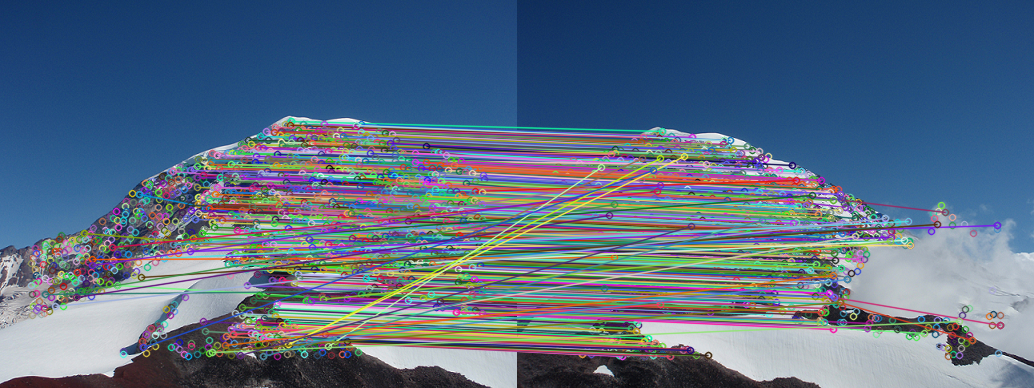

True

In [18]:
import numpy as np 
import cv2 
from google.colab.patches import cv2_imshow   

IDX_X, IDX_Y, IDX_SIZE, IDX_ANGLE, IDX_RESPONSE, IDX_OCTAVE = (
    0, 1, 2, 3, 4, 5)  # , IDX_CLASSID not used
    
def kp_list_2_opencv_kp_list(kp_list):

    opencv_kp_list = []
    for kp in kp_list:
        opencv_kp = cv2.KeyPoint(x=kp[IDX_Y],
                                 y=kp[IDX_X],
                                 _size=1
                                 )
        opencv_kp_list += [opencv_kp]

    return opencv_kp_list

query_img = cv2.imread('Rainier1.png') 
train_img = cv2.imread('Rainier2.png') 

query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 

orb = cv2.ORB_create() 

queryKeypoints = kp_list_2_opencv_kp_list(PointList1)
queryKeypoints, queryDescriptors = orb.compute(query_img_bw,queryKeypoints) 

trainKeypoints = kp_list_2_opencv_kp_list(PointList2)
trainKeypoints, trainDescriptors = orb.compute(train_img_bw,trainKeypoints) 

matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(queryDescriptors,trainDescriptors) 

final_img = cv2.drawMatches(query_img, queryKeypoints,  
train_img, trainKeypoints, matches,None) 
   
cv2_imshow(final_img)
outname = "2a.png"
cv2.imwrite(outname, final_img) 

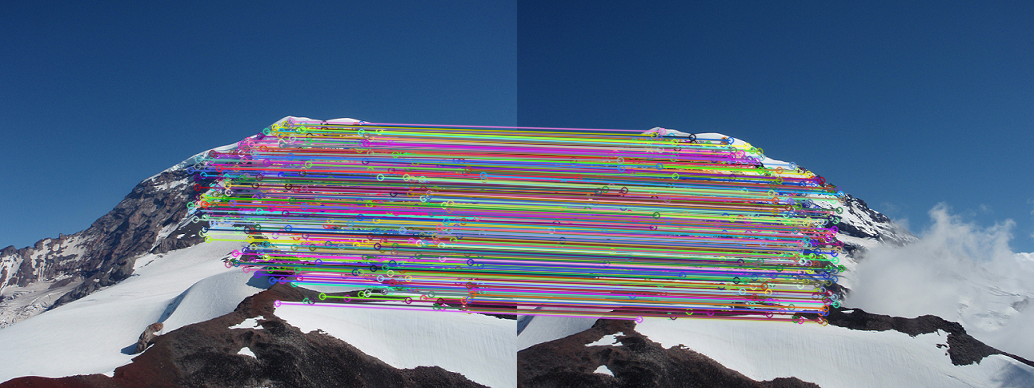

True

In [19]:
matches = sorted(matches, key = lambda x: x.distance)
src_pts = np.float32([ queryKeypoints[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ trainKeypoints[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
draw_params = dict(singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(query_img,queryKeypoints,train_img,trainKeypoints,matches,None,**draw_params)
cv2_imshow(img3)
outname = "2b.png"
cv2.imwrite(outname, img3)

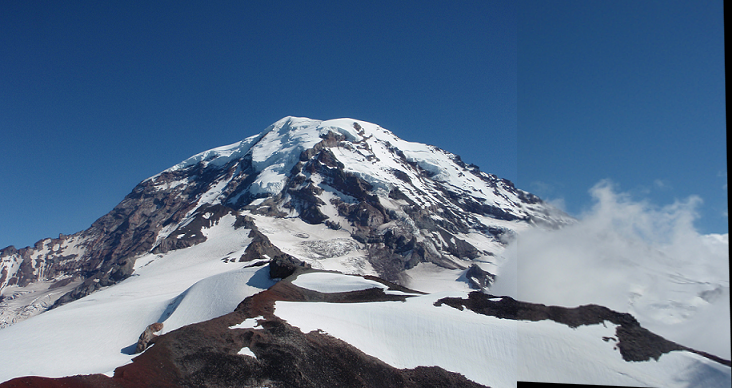

True

In [60]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    elif not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    elif not np.sum(frame[:,0]):
        return trim(frame[:,1:]) 
    #crop right
    elif not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])    
    return frame
def stitch(image1,image2, hom, homInv):
    dst = cv2.warpPerspective(image2,homInv,(image2.shape[1] + image1.shape[1], image1.shape[0]))
    dst[0:image1.shape[0],0:image1.shape[1]] = image1
    return dst
H = np.linalg.inv(M)
dst = stitch(query_img, train_img, M, H)
cv2_imshow(trim(dst))
outname = "3.png"
cv2.imwrite(outname, trim(dst))

In [3]:
import cv2
import numpy as np 

class matchers:
	def __init__(self):
		self.surf = cv2.xfeatures2d.SURF_create()
		FLANN_INDEX_KDTREE = 0
		index_params = dict(algorithm=0, trees=5)
		search_params = dict(checks=50)
		self.flann = cv2.FlannBasedMatcher(index_params, search_params)

	def match(self, i1, i2, direction=None):
		imageSet1 = self.getSURFFeatures(i1)
		imageSet2 = self.getSURFFeatures(i2)
		matches = self.flann.knnMatch(
			imageSet2['des'],
			imageSet1['des'],
			k=2
			)
		good = []
		for i , (m, n) in enumerate(matches):
			if m.distance < 0.7*n.distance:
				good.append((m.trainIdx, m.queryIdx))

		if len(good) > 4:
			pointsCurrent = imageSet2['kp']
			pointsPrevious = imageSet1['kp']

			matchedPointsCurrent = np.float32(
				[pointsCurrent[i].pt for (__, i) in good]
			)
			matchedPointsPrev = np.float32(
				[pointsPrevious[i].pt for (i, __) in good]
				)

			H, s = cv2.findHomography(matchedPointsCurrent, matchedPointsPrev, cv2.RANSAC, 4)
			return H
		return None

	def getSURFFeatures(self, im):
		gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
		kp, des = self.surf.detectAndCompute(gray, None)
		return {'kp':kp, 'des':des}

Parameters :  -f
['Rainier3.png', 'Rainier4.png', 'Rainier5.png', 'Rainier1.png', 'Rainier2.png', 'Rainier6.png']
Number of images : 6
Center index image : 3
Image lists prepared
Homography is :  [[ 1.02318779e+00 -1.09626208e-01 -4.96435284e+01]
 [ 3.21448393e-02  8.63566355e-01  1.32595281e+02]
 [ 1.64144358e-04 -5.52215827e-04  1.00000000e+00]]
Inverse Homography : [[ 9.68190144e-01  1.41633949e-01  2.92843816e+01]
 [-1.07280282e-02  1.06590850e+00 -1.41867014e+02]
 [-1.64847136e-04  5.65363130e-04  9.16851923e-01]]
final ds=> [529.46842913 190.52262433   1.        ]
image dsize => (602, 502)
Homography is :  [[ 6.43827442e-01 -2.22589302e-02  3.05653853e+02]
 [-1.30752085e-01  1.02497202e+00  1.03439730e+02]
 [-7.89634099e-04  2.63576418e-04  1.00000000e+00]]
Inverse Homography : [[ 1.13620248e+00  1.17095112e-01 -3.59396954e+02]
 [ 5.58844512e-02  1.00805688e+00 -1.21354429e+02]
 [ 8.82454402e-04 -1.73237727e-04  7.48194075e-01]]
final ds=> [321.5006514  350.81290655   1.        ]

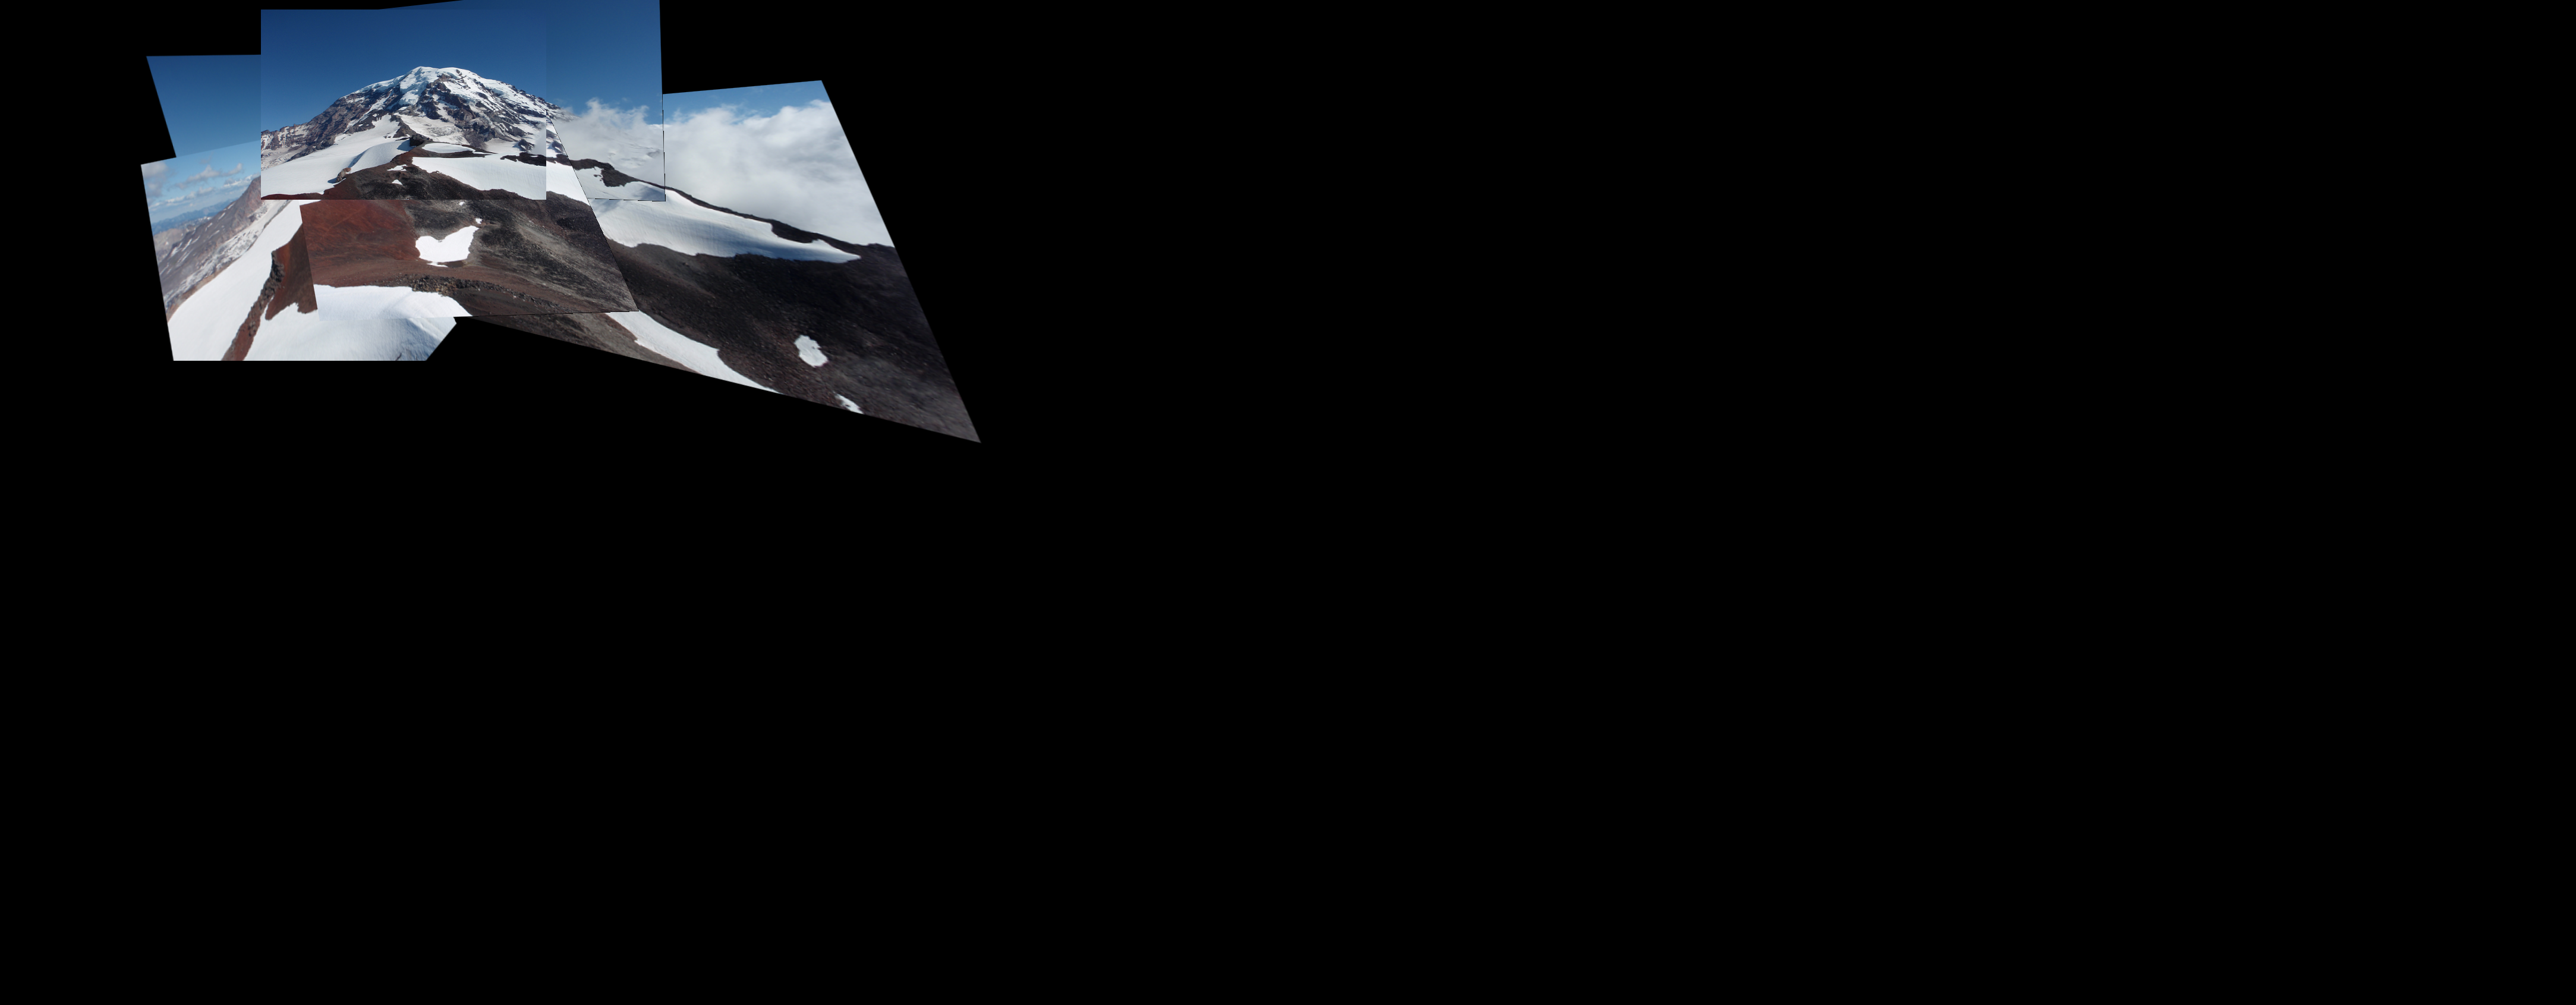

image written


In [34]:
import numpy as np
import cv2
import sys
import time
from google.colab.patches import cv2_imshow

def trim(frame):
	#crop top
	if not np.sum(frame[0]):
		return trim(frame[1:])
	#crop bottom
	elif not np.sum(frame[-1]):
		return trim(frame[:-2])
	#crop left
	elif not np.sum(frame[:,0]):
		return trim(frame[:,1:]) 
	#crop right
	elif not np.sum(frame[:,-1]):
		return trim(frame[:,:-2])    
	return frame

class Stitch:
	def __init__(self, args):
		self.path = args
		fp = open("files.txt", 'r')
		filenames = [each.rstrip('\r\n') for each in  fp.readlines()]
		print(filenames)
		self.images = [cv2.resize(cv2.imread(each),(480, 320)) for each in filenames]
		self.count = len(self.images)
		self.left_list, self.right_list, self.center_im = [], [],None
		self.matcher_obj = matchers()
		self.prepare_lists()

	def prepare_lists(self):
		print("Number of images : %d"%self.count)
		self.centerIdx = self.count/2 
		print("Center index image : %d"%self.centerIdx)
		self.center_im = self.images[int(self.centerIdx)]
		for i in range(self.count):
			if(i<=self.centerIdx):
				self.left_list.append(self.images[i])
			else:
				self.right_list.append(self.images[i])
		print("Image lists prepared")

	def leftshift(self):
		# self.left_list = reversed(self.left_list)
		a = self.left_list[0]
		for b in self.left_list[1:]:
			H = self.matcher_obj.match(a, b, 'left')
			print("Homography is : ", H)
			xh = np.linalg.inv(H)
			print("Inverse Homography :", xh)
			ds = np.dot(xh, np.array([a.shape[1], a.shape[0], 1]));
			ds = ds/ds[-1]
			print("final ds=>", ds)
			f1 = np.dot(xh, np.array([0,0,1]))
			f1 = f1/f1[-1]
			xh[0][-1] += abs(f1[0])
			xh[1][-1] += abs(f1[1])
			ds = np.dot(xh, np.array([a.shape[1], a.shape[0], 1]))
			offsety = abs(int(f1[1]))
			offsetx = abs(int(f1[0]))
			dsize = (int(ds[0])+offsetx, int(ds[1]) + offsety)
			print("image dsize =>", dsize)
			tmp = cv2.warpPerspective(a, xh, dsize)
			# cv2.imshow("warped", tmp)
			# cv2.waitKey()
			tmp[offsety:b.shape[0]+offsety, offsetx:b.shape[1]+offsetx] = b
			a = tmp

		self.leftImage = tmp

		
	def rightshift(self):
		for each in self.right_list:
			H = self.matcher_obj.match(self.leftImage, each, 'right')
			print("Homography :", H)
			txyz = np.dot(H, np.array([each.shape[1], each.shape[0], 1]))
			txyz = txyz/txyz[-1]
			dsize = (int(txyz[0])+self.leftImage.shape[1], int(txyz[1])+self.leftImage.shape[0])
			tmp = cv2.warpPerspective(each, H, dsize)
			#cv2_imshow(tmp)
			cv2.waitKey()
			# tmp[:self.leftImage.shape[0], :self.leftImage.shape[1]]=self.leftImage
			tmp = self.mix_and_match(self.leftImage, tmp)
			print("tmp shape",tmp.shape)
			print("self.leftimage shape=", self.leftImage.shape)
			self.leftImage = tmp
		# self.showImage('left')



	def mix_and_match(self, leftImage, warpedImage):
		i1y, i1x = leftImage.shape[:2]
		i2y, i2x = warpedImage.shape[:2]
		print(leftImage[-1,-1])

		t = time.time()
		black_l = np.where(leftImage == np.array([0,0,0]))
		black_wi = np.where(warpedImage == np.array([0,0,0]))
		print(time.time() - t)
		print(black_l[-1])

		for i in range(0, i1x):
			for j in range(0, i1y):
				try:
					if(np.array_equal(leftImage[j,i],np.array([0,0,0])) and  np.array_equal(warpedImage[j,i],np.array([0,0,0]))):
						
						warpedImage[j,i] = [0, 0, 0]
					else:
						if(np.array_equal(warpedImage[j,i],[0,0,0])):
							
							warpedImage[j,i] = leftImage[j,i]
						else:
							if not np.array_equal(leftImage[j,i], [0,0,0]):
								bw, gw, rw = warpedImage[j,i]
								bl,gl,rl = leftImage[j,i]
								# b = (bl+bw)/2
								# g = (gl+gw)/2
								# r = (rl+rw)/2
								warpedImage[j, i] = [bl,gl,rl]
				except:
					pass
		# cv2.imshow("waRPED mix", warpedImage)
		# cv2.waitKey()
		return warpedImage




	def trim_left(self):
		pass

	def showImage(self, string=None):
		if string == 'left':
			cv2_imshow(self.leftImage)
			# cv2.imshow("left image", cv2.resize(self.leftImage, (400,400)))
		elif string == "right":
			cv2_imshow(self.rightImage)
		cv2.waitKey()


if __name__ == '__main__':
	  try:
		  args = sys.argv[1]
	  except:
		  args = "files.txt"
	  finally:
		  print("Parameters : ", args)
	  s = Stitch(args)
	  s.leftshift()
	  # s.showImage('left')
	  s.rightshift()
	  print("done")
	  cv2_imshow(s.leftImage)
	  cv2.imwrite("4a.jpg", s.leftImage)
	  print("image written")
	  cv2.destroyAllWindows()